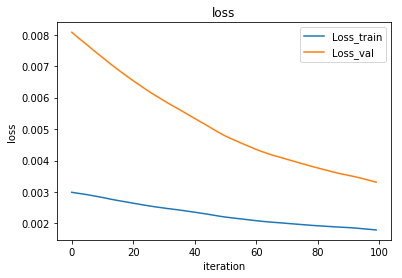

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import time
import jupyter


%matplotlib inline

mem = Memory("./mycache")
@mem.cache

def get_data():
    data = load_svmlight_file("australian.txt")
    return data[0], data[1]

#计算梯度
def g(x, y, w,b):
    grad = 0.01*w#1/2c
    for i in range(x.shape[0]):
        if y[i] * (w.transpose().dot(x[i]) + b) < 1:
              grad -= (x[i] * y[i]).reshape(x.shape[1], 1)
    return grad

 
#计算损失函数        
def Loss(x, y, w, b):
    loss = 0.5 *0.01* w.transpose().dot(w)#1/2c    
    for i in range(x.shape[0]):
        if y[i] * (w.transpose().dot(x[i]) + b) < 1:
            return loss +(1 - y[i] * (w.transpose().dot(x[i]) + b))
     



                              

X, y = get_data()
X = X.toarray()
m = y.shape[0]
y=y.reshape(m,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)




w = np.random.random(size = (X_train.shape[1], 1))
b = 2
a = 0.0001
iteration = 100



# 梯度下降法更新参数

Loss_train = []
Loss_val = []
Rate_train = []
Rate_val = []

for i in range(iteration):
    w -= a * g(X_train, y_train,w, b)
    loss_train = Loss(X_train, y_train,w, b)
    loss_test = Loss(X_test, y_test,w, b)
    Loss_train.append(loss_train[0] / X_train.shape[0])
    Loss_val.append(loss_test[0] / X_test.shape[0])
    #correct rate
    iteration_train = 0
    h1 = y_train * (X_train.dot(w) + b)
    for i in h1:
        if i > 0:
             iteration_train += 1
    rate_train = iteration_train / h1.shape[0]
    Rate_train.append(rate_train)
    #correct rate
    iteration_test = 0
    h2 = y_test * (X_test.dot(w) + b)
    for i in h2:
        if i > 0:
            iteration_test += 1
    rate_test = iteration_test / h2.shape[0]
    Rate_val.append(rate_test)
            

            
                          
def paint(loops, train_loss, test_loss, train_rate, test_rate):
    #tloss
    plt.plot(train_loss, label='Loss_train')
    plt.plot(test_loss, label='Loss_val')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('loss')
    plt.legend()
    plt.show()

             
paint(iteration, Loss_train,Loss_val, Rate_train, Rate_val )

